In [1]:
%pylab inline
import pygadgetreader
import reading_snapshots


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)


In [3]:
MW_mass = pygadgetreader.readsnap('../../MW_anisotropy/code/test_snaps/MWLMC5_100M_new_b1_110', 'mass', 'dm')

Returning DM    Mass


In [4]:
MW_post = reading_snapshots.read_MW_snap_com_coordinates('../../MW_anisotropy/code/test_snaps/', 'MWLMC5_100M_new_b1_110', LMC=True,
                                                                 N_halo_part=100000000, pot=True)

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
Returning DM    Potential
Loading MW particles and LMC particles


In [5]:
mw_pmass  = 1.577212515257997438e-06 
lmc_pmass = 1.1996922e-06

In [6]:
lmc_part_1 = np.loadtxt('../data/LMC/LMC_15M_unbound_2T_V.txt')

In [7]:
lmc_pos = lmc_part_1[:,0:3]

In [8]:
posx_all = np.concatenate((MW_post[0][:,0], lmc_pos[:,0]))
posy_all = np.concatenate((MW_post[0][:,1], lmc_pos[:,1]))
posz_all = np.concatenate((MW_post[0][:,2], lmc_pos[:,2]))
mass_all = np.concatenate((np.ones(100000000)*mw_pmass, lmc_part_1[:,6]))

In [9]:
dist_mwmlmc = (posx_all**2 + posy_all**2 + posz_all**2)**0.5

In [10]:
len(dist_mwmlmc)

110344282

In [11]:
index_300 = np.where(dist_mwmlmc<300)[0]

In [12]:
posx_300 = posx_all[index_300]
posy_300 = posy_all[index_300]
posz_300 = posz_all[index_300]
mass_300 = mass_all[index_300]

In [13]:
np.savetxt('MW_LMC_unbound_2T_V_b1_dm_part_1e8.txt', np.array([posx_300, posy_300, posz_300, mass_300]).T)

In [14]:
index_lmc_part = np.where(mass_300==lmc_pmass)[0]
index_mw_part = np.where(mass_300==mw_pmass)[0]

In [15]:
N_random_1e6 = np.random.randint(0, len(index_300), 1000000)

In [16]:
posx_300_lr = posx_300[N_random_1e6]
posy_300_lr = posy_300[N_random_1e6]
posz_300_lr = posz_300[N_random_1e6]
mass_300_lr = mass_300[N_random_1e6]

In [17]:
index_lmc_part_lr = np.where(mass_300_lr==lmc_pmass)[0]
index_mw_part_lr = np.where(mass_300_lr==mw_pmass)[0]

In [18]:
print(len(index_lmc_part), len(index_lmc_part_lr))
print(len(index_mw_part), len(index_mw_part_lr))

8315483 96566
77615339 903434


In [19]:
lr_lmc_pmass = lmc_pmass * len(index_lmc_part)/len(index_lmc_part_lr)
lr_mw_pmass =  mw_pmass * len(index_mw_part)/len(index_mw_part_lr) 

In [20]:
print(lr_lmc_pmass, lmc_pmass)
print(lr_mw_pmass, mw_pmass)


0.00010330779046799703 1.1996922e-06
0.0001355006387260078 1.5772125152579974e-06


In [21]:
np.savetxt('MW_LMC_unbound_2T_V_100M_b1_dm_part_1e6_300.txt', 
           np.array([posx_300_lr, posy_300_lr, posz_300_lr, mass_300_lr]).T)


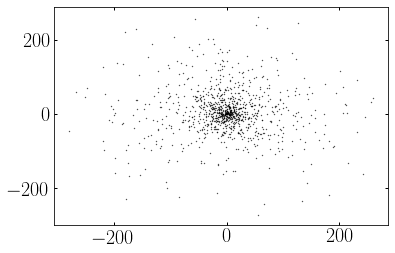

In [22]:
scatter(posy_300_lr[:1000], posz_300_lr[:1000], c='k', s=0.1)